#**Laptop Data Preprocessing and Model Training**

###This Notebook is a continuation of Laptop_preprocessing_1.ipynb
###Here we will focus on data preprocessing which will include outlier removal and model training after that.

In [ ]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import stat
import numpy as np
import re

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nikhil-xyz/datasets/refs/heads/main/df_cleaned_25_09_2024.csv')

In [ ]:
df.head()

,Unnamed: 0,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Color,Graphics,Disk_size,Card_desc,Price
0,0,"2022 microsoft surface laptop go 12.4"" touchsc...",Microsoft,12.4,i5,4.0,windows 11,3.9,silver,Intel,256,Integrated,29519.18
1,1,"hp envy 34” all-in-one desktop, nvidia geforce...",HP,34.0,i7,32.0,windows 11,4.4,other,Nvidia,512,other,177694.00
2,2,dell latitude 3510 business laptop black (inte...,Dell,15.6,i5,16.0,windows 10,4.3,black,Intel,256,Integrated,67076.00
3,3,"msi bravo 15 15.6"" 144hz gaming laptop: amd ry...",MSI,15.6,ryzen5,16.0,windows 11,4.5,black,AMD,512,other,57318.00
4,4,"msi latest ge76 raider gaming laptop | 17.3"" 1...",MSI,17.3,i9,64.0,windows 11,5.0,blue,Nvidia,2048,Dedicated,200899.18


In [ ]:
df.shape

(1810, 13)

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Title,0
Brand,0
Screen_Size,0
CPU_Model,0
Ram,0
Operating_System,0
Rating,0
Color,0
Graphics,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1810 non-null   int64  
 1   Title             1810 non-null   object 
 2   Brand             1810 non-null   object 
 3   Screen_Size       1810 non-null   float64
 4   CPU_Model         1810 non-null   object 
 5   Ram               1810 non-null   float64
 6   Operating_System  1810 non-null   object 
 7   Rating            1810 non-null   float64
 8   Color             1810 non-null   object 
 9   Graphics          1810 non-null   object 
 10  Disk_size         1810 non-null   int64  
 11  Card_desc         1810 non-null   object 
 12  Price             1810 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 184.0+ KB


In [ ]:
df.index.values

array([   0,    1,    2, ..., 1807, 1808, 1809])

##**Outlier Removal**

- In this module, we will focus on Ram and Disk_size.
- We will filter out all the rows where Ram volume is greater than Disk volume  

In [ ]:
ram_disk = df[df.Ram > df.Disk_size]
ram_disk

,Unnamed: 0,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Color,Graphics,Disk_size,Card_desc,Price
768,803,"gigabyte g5 me: 15.6"" fhd 144hz, nvidia geforc...",GIGABYTE,15.6,i5,32.0,windows 11,0.0,black,Nvidia,16,Dedicated,65317.1


In [ ]:
ram_disk.Title.values

array(['gigabyte g5 me: 15.6" fhd 144hz, nvidia geforce rtx 3050 laptop gpu 6gb gddr6, intel core i5-12500h, 16gb memory, 512gb ssd, win11 home, gaming laptop (g5 me-51us213sh)'],
      dtype=object)

In [ ]:
ram_disk[['Title', 'Ram', 'Disk_size']].values

array([['gigabyte g5 me: 15.6" fhd 144hz, nvidia geforce rtx 3050 laptop gpu 6gb gddr6, intel core i5-12500h, 16gb memory, 512gb ssd, win11 home, gaming laptop (g5 me-51us213sh)',
        32.0, 16]], dtype=object)

###**Observations**
- It appears that some values are incorrectly assigned. Also, Title section contains all the required information.
- We will use regular expressions to retrieve values
- Once values are retrieved, we will focus on type conversion. All the volumes will be converted to gb.

In [ ]:
ram_disk_pattern = r'(\d{1,3}\s*gb|\d{1,3}\s*tb)'
ram_disk.Title.str.findall(ram_disk_pattern)

,Title
768,"[6gb, 16gb, 512gb]"


In [ ]:
def ram_retrieval(string):
  ram_disk_pattern = r'(\d{1,3}\s*gb|\d{1,3}\s*tb)'
  ram_disk_values = re.findall(ram_disk_pattern, string)

  if len(ram_disk_values) == 2: # If an expressions 2 values
    return ram_disk_values[0]
  elif len(ram_disk_values) == 3: # If an expressions 3 values
    return ram_disk_values[1]
  elif len(ram_disk_values) == 4: # If an expressions 4 values
    return ram_disk_values[1]

ram_disk['Ram'] = ram_disk.Title.apply(ram_retrieval)

<ipython-input-12-0ead7770b535>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ram_disk['Ram'] = ram_disk.Title.apply(ram_retrieval)


In [ ]:
def disk_retrieval(string):
  ram_disk_pattern = r'(\d{1,3}\s*gb|\d{1,3}\s*tb)'
  ram_disk_values = re.findall(ram_disk_pattern, string)

  if len(ram_disk_values) == 2: # If an expressions 2 values
    return ram_disk_values[1]
  elif len(ram_disk_values) == 3: # If an expressions 3 values
    return ram_disk_values[2]
  elif len(ram_disk_values) == 4: # If an expressions 4 values
    return ram_disk_values[2]

ram_disk['Disk_size'] = ram_disk.Title.apply(disk_retrieval)

<ipython-input-13-7760ae2f80ba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ram_disk['Disk_size'] = ram_disk.Title.apply(disk_retrieval)


In [ ]:
ram_disk[['Title', 'Ram', 'Disk_size']]

,Title,Ram,Disk_size
768,"gigabyte g5 me: 15.6"" fhd 144hz, nvidia geforc...",16gb,512gb


In [ ]:
# Unit conversion function
def convert_to_gb(value):
  if 'tb' in value:
      return float(value.replace('tb', '')) * 1024
  else:
      return float(value.replace('gb', ''))

# Apply the conversion function to the 'Ram' and 'Disk_size' columns
ram_disk['Ram'] = ram_disk['Ram'].apply(convert_to_gb)
ram_disk['Disk_size'] = ram_disk['Disk_size'].apply(convert_to_gb)

<ipython-input-15-4499706af790>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ram_disk['Ram'] = ram_disk['Ram'].apply(convert_to_gb)
<ipython-input-15-4499706af790>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ram_disk['Disk_size'] = ram_disk['Disk_size'].apply(convert_to_gb)


In [ ]:
ram_disk[['Title', 'Ram', 'Disk_size']]

,Title,Ram,Disk_size
768,"gigabyte g5 me: 15.6"" fhd 144hz, nvidia geforc...",16.0,512.0


In [ ]:
# Merging with the original dataframe
df = pd.concat([df.drop(ram_disk.index), ram_disk])

In [ ]:
df.reset_index(drop=True, inplace=True)

###**Removing outliers from the Ram**

In [ ]:
df.Ram.value_counts()

,count
Ram,
16.000000,616
8.000000,472
4.000000,347
32.000000,218
64.000000,53
12.000000,36
20.000000,27
2.000000,12
6.000000,10


###**Observations**
- It is highly unlikely for Ram to have volume in MBs or more than 64 GB.
- Entries qualifying for the above criteria should be considered as an outliers and hence should be removed.

In [ ]:
df.shape

(1810, 13)

In [ ]:
# Filtering Ram outliers
ram_removed = df[(df.Ram > 64) | (df.Ram < 2)]
ram_removed

,Unnamed: 0,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Color,Graphics,Disk_size,Card_desc,Price
95,97,"2022 msi gf65 thin 15.6"" fhd ips 144hz gaming ...",MSI,15.6,i7,128.000000,windows 11,5.0,black,Nvidia,4096.0,Dedicated,118899.18
103,105,2022 msi creatorpro x17 a12uks-059 (i9-12900hx...,EXCaliberPC,17.3,i9,128.000000,windows 11,0.0,other,Nvidia,2048.0,Dedicated,426318.00
213,215,2022 msi creatorpro x17 a12uks-059 (i9-12900hx...,EXCaliberPC,17.3,i9,128.000000,windows 11,0.0,other,Nvidia,2048.0,Dedicated,426318.00
446,452,cf-31/mk6/16gb ram/1tb ssd/windows/intel core ...,Panasonic,13.1,i5,1024.000000,windows 10,0.0,black,Intel,1024.0,Integrated,377199.18
571,579,excaliberpc 2023 msi titan gt77hx 13vh-046us p...,EXCaliberPC,17.3,i9,128.000000,windows 11,0.0,other,Nvidia,6144.0,other,499298.00
833,869,"lincplus p3 14 inch thin and light laptop pc, ...",LincPlus,14.0,celeron,128.000000,windows 10,3.6,white,Intel,128.0,Integrated,16318.00
978,1014,"hp pavilion 15 laptop, 11th gen intel core i7-...",HP,15.6,i7,0.015625,windows 11,4.4,silver,Intel,512.0,Integrated,49118.00
1140,1176,"lincplus p3 14 inch thin and light laptop pc, ...",LincPlus,14.0,celeron,128.000000,windows 10,3.6,white,Intel,128.0,Integrated,16318.00
1536,1574,"lincplus p3 14 inch thin and light laptop pc, ...",LincPlus,14.0,celeron,128.000000,windows 10,3.6,white,Intel,128.0,Integrated,16318.00
1783,1825,samsung 15.6” galaxy book2 pro with intel arc ...,SAMSUNG,15.6,i7,1024.000000,windows 10,4.1,other,Intel,1024.0,Dedicated,147599.18


In [ ]:
ram_removed[['Title', 'Ram', 'Disk_size']].values

array([['2022 msi gf65 thin 15.6" fhd ips 144hz gaming laptop intel 8-core i7-10750h nvidia geforce rtx 3060 6gb gddr6 32gb ddr4 1tb nvme ssd hdmi usb-c wifi ax rj-45 backlit windows 11 home w/ free 32gb usb',
        128.0, 4096.0],
       ['2022 msi creatorpro x17 a12uks-059 (i9-12900hx, 128gb ram, 2tb platinum p41 nvme ssd, rtx a3000 12gb, 17.3" 4k uhd, windows 11 pro) content creation laptop',
        128.0, 2048.0],
       ['2022 msi creatorpro x17 a12uks-059 (i9-12900hx, 128gb ram, 2tb platinum p41 nvme ssd, rtx a3000 12gb, 17.3" 4k uhd, windows 11 pro) content creation laptop',
        128.0, 2048.0],
       ['cf-31/mk6/16gb ram/1tb ssd/windows/intel core i5-7300u 2.60ghz/13.1" xga touchscreen lcd/hdmi/gigabit lan/rj45/dual pass/usb 3.0/usb 2(3 ports)/9 pin serial port/vga/bt/wifi/standard keyboard',
        1024.0, 1024.0],
       ['excaliberpc 2023 msi titan gt77hx 13vh-046us pro extreme (i9-13980hx, 128gb ram, 6tb nvme ssd, rtx 4080 12gb, 17.3" 4k uhd, windows 11 pro) gaming 

###**Observations**
- It looks like outliers are appearing because of the improper value assignment from product description.
- We already have design functions above to filter Ram and Disk volumes from the Title section and their unit conversion.
- For Ram, we have 'ram_retrieval' function. For Disk, we have 'disk_retrieval' function. And for unit conversion, we have 'convert_to_gb' function.

In [ ]:
ram_removed.Ram = ram_removed.Title.apply(ram_retrieval)
ram_removed.Disk_size = ram_removed.Title.apply(disk_retrieval)
ram_removed.Ram = ram_removed.Ram.apply(convert_to_gb)
ram_removed.Disk_size = ram_removed.Disk_size.apply(convert_to_gb)

<ipython-input-23-4d0cf9ca1b49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ram_removed.Ram = ram_removed.Title.apply(ram_retrieval)
<ipython-input-23-4d0cf9ca1b49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ram_removed.Disk_size = ram_removed.Title.apply(disk_retrieval)
<ipython-input-23-4d0cf9ca1b49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
ram_removed.Ram.value_counts()

,count
Ram,
4.0,3
32.0,2
2048.0,2
16.0,2
6144.0,1


In [ ]:
# Merging it back to original dataframe
df = pd.concat([df.drop(ram_removed.index), ram_removed])
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(1810, 13)

In [ ]:
df.Ram.value_counts()

,count
Ram,
16.0,618
8.0,472
4.0,350
32.0,220
64.0,53
12.0,36
20.0,27
2.0,12
6.0,10


In [ ]:
df[df.Ram == 6144].Title.values

array(['excaliberpc 2023 msi titan gt77hx 13vh-046us pro extreme (i9-13980hx, 128gb ram, 6tb nvme ssd, rtx 4080 12gb, 17.3" 4k uhd, windows 11 pro) gaming laptop'],
      dtype=object)

In [ ]:
df.Disk_size.value_counts()

,count
Disk_size,
1024.0,508
512.0,487
256.0,262
64.0,175
128.0,156
32.0,84
2048.0,63
16.0,31
500.0,14


In [ ]:
df.drop(df[df.Ram > df.Disk_size].index, inplace=True)

In [ ]:
df[df.Ram > df.Disk_size]

,Unnamed: 0,Title,Brand,Screen_Size,CPU_Model,Ram,Operating_System,Rating,Color,Graphics,Disk_size,Card_desc,Price


In [ ]:
df.drop('Title', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1807 entries, 0 to 1809
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1807 non-null   int64  
 1   Brand             1807 non-null   object 
 2   Screen_Size       1807 non-null   float64
 3   CPU_Model         1807 non-null   object 
 4   Ram               1807 non-null   float64
 5   Operating_System  1807 non-null   object 
 6   Rating            1807 non-null   float64
 7   Color             1807 non-null   object 
 8   Graphics          1807 non-null   object 
 9   Disk_size         1807 non-null   float64
 10  Card_desc         1807 non-null   object 
 11  Price             1807 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 183.5+ KB


In [ ]:
temp_brand = df.Brand.value_counts()
temp_brand[temp_brand < 10]

,count
Brand,
Generic,8
Fusion5,7
Packard Bell,6
Apple,5
LincPlus,4
BiTECOOL,2
Best Notebooks,2
Unknown,2
Razer,2


In [ ]:
# Replace Brands with value count less than 10 with 'other'
df.Brand = df.Brand.apply(lambda x: 'other' if temp_brand[x] < 10 else x)

In [ ]:
df.Brand.value_counts()

,count
Brand,
ASUS,314
HP,287
Acer,252
MSI,181
Dell,165
SAMSUNG,115
EXCaliberPC,91
Alienware,79
Microsoft,70


In [ ]:
X = df.drop('Price', axis=1)
y = df.Price

In [ ]:
y = np.array(y)
type(y)

numpy.ndarray

In [ ]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
numerical_features = df.select_dtypes(exclude='object').columns.tolist()[:-1]
target_feature = 'Price'

In [ ]:
print('Categorical Features: {}'.format(categorical_features))
print('Numerical Features: {}'.format(numerical_features))
print('Target Feature: {}'.format(target_feature))

Categorical Features: ['Brand', 'CPU_Model', 'Operating_System', 'Color', 'Graphics', 'Card_desc']
Numerical Features: ['Unnamed: 0', 'Screen_Size', 'Ram', 'Rating', 'Disk_size']
Target Feature: Price


In [ ]:
numerical_features = numerical_features[1:]

In [ ]:
numerical_features

['Screen_Size', 'Ram', 'Rating', 'Disk_size']

<Axes: >

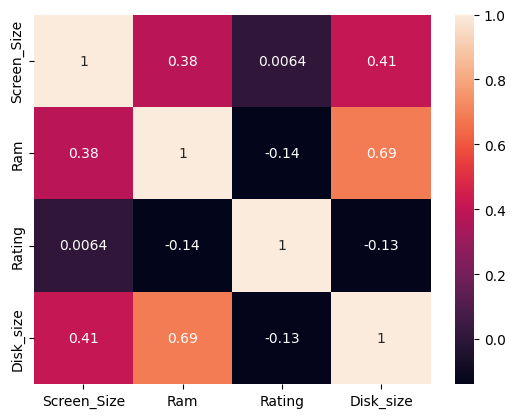

In [ ]:
sns.heatmap(df[numerical_features].corr(), annot=True)

<Axes: >

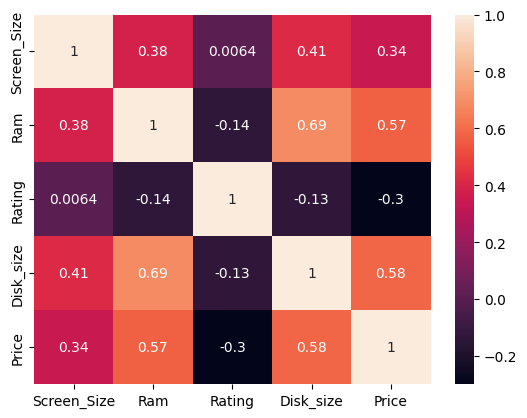

In [ ]:
sns.heatmap(df[['Screen_Size', 'Ram', 'Rating', 'Disk_size', 'Price']].corr(), annot=True)

In [ ]:
for feature in categorical_features:
  print('{}'.format(df[feature].value_counts()))
  print('\n')

Brand
ASUS           314
HP             287
Acer           252
MSI            181
Dell           165
SAMSUNG        115
EXCaliberPC     91
Alienware       79
Microsoft       70
LG              70
other           58
Panasonic       32
Lenovo          32
GIGABYTE        28
Toughbook       21
CHUWI           12
Name: count, dtype: int64


CPU_Model
i7         584
i5         366
i3         288
celeron    269
ryzen7      81
i9          80
ryzen5      69
ryzen3      40
ryzen9      30
Name: count, dtype: int64


Operating_System
windows 11    837
windows 10    745
chrome_os     187
windows 7      27
windows 8       6
mac_os          5
Name: count, dtype: int64


Color
other     663
black     472
silver    367
gray      125
blue       95
white      47
gold       38
Name: count, dtype: int64


Graphics
Intel     1000
Nvidia     513
AMD        205
Other       89
Name: count, dtype: int64


Card_desc
Integrated    1106
Dedicated      481
other          220
Name: count, dtype: int64




### Let's calculate correlation and p-value between numerical feature and the target feature

In [ ]:
import scipy.stats as stats # imports stats module from scipy

def correlation_test(feature, target):
  """
  Calculates and prints the Pearson correlation coefficient and p-value
  between a feature and the target variable.

  Args:
    feature: The name of the feature column.
    target: The name of the target column.
  """
  pearson_coef, p_value = stats.pearsonr(df[feature], df[target])
  # print(f"{feature}: Pearson coefficient = {pearson_coef:.2f}, p-value = {p_value:.3f}")
  return p_value

# Assuming 'df', 'numerical_features', and 'target_feature' are defined
significance = []
result = []
for feature in numerical_features:
  p_value = correlation_test(feature, target_feature)
  significance.append(feature)
  if p_value < 0.05:
    result.append('Reject Null Hypothesis')
  else:
    result.append('Failed to reject Null Hypothesis')

pd.DataFrame({'Feature': significance, 'Result': result})



,Feature,Result
0,Screen_Size,Reject Null Hypothesis
1,Ram,Reject Null Hypothesis
2,Rating,Reject Null Hypothesis
3,Disk_size,Reject Null Hypothesis


###Even though Disk_size is showing no significance, we will consider it for the model training anyway.

In [ ]:
from scipy.stats import chi2_contingency

def chi_square_test(df, feature, target):
  """
  Performs a chi-square test of independence between a categorical feature and
  a target variable.

  Args:
    df: The DataFrame containing the data.
    feature: The name of the feature column.
    target: The name of the target column.

  Returns:
    A tuple containing the chi-square statistic, p-value, degrees of freedom,
    and expected frequencies.
  """
  crosstab = pd.crosstab(df[feature], df[target])
  chi2, p, dof, expected = chi2_contingency(crosstab)
  return chi2, p, dof, expected


significance = []
result = []
for feature in categorical_features:
  chi2, p, dof, expected = chi_square_test(df, feature, target_feature)
  significance.append(feature)

  if p < 0.05:
    result.append('Reject Null Hypothesis')
  else:
    result.append('Failed to reject Null Hypothesis')

pd.DataFrame({'Feature': significance, 'Result': result})

,Feature,Result
0,Brand,Reject Null Hypothesis
1,CPU_Model,Reject Null Hypothesis
2,Operating_System,Reject Null Hypothesis
3,Color,Reject Null Hypothesis
4,Graphics,Reject Null Hypothesis
5,Card_desc,Reject Null Hypothesis


In [ ]:
def anova_test(df, feature, target):
  """
  Performs a one-way ANOVA test between a categorical feature and a continuous target.

  Args:
    df: DataFrame containing the data.
    feature: Name of the categorical feature column.
    target: Name of the continuous target column.

  Returns:
    A tuple containing the F-statistic and p-value.
  """
  groups = df[feature].unique()
  samples = [df[df[feature] == g][target] for g in groups]
  f_statistic, p_value = stats.f_oneway(*samples)
  return f_statistic, p_value

significance = []
result = []

for feature in categorical_features:
  f_statistic, p_value = anova_test(df, feature, target_feature)
  significance.append(feature)
  if p_value < 0.05:
    result.append('Reject Null Hypothesis')
  else:
    result.append('Failed to reject Null Hypothesis')

pd.DataFrame({'Feature': significance, 'Result': result})

,Feature,Result
0,Brand,Reject Null Hypothesis
1,CPU_Model,Reject Null Hypothesis
2,Operating_System,Reject Null Hypothesis
3,Color,Reject Null Hypothesis
4,Graphics,Reject Null Hypothesis
5,Card_desc,Reject Null Hypothesis


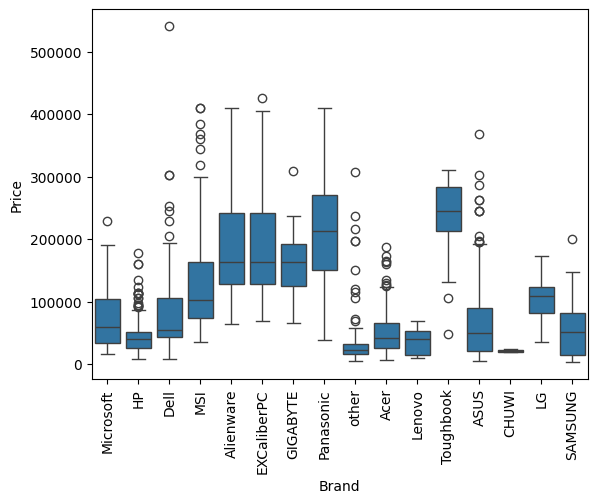

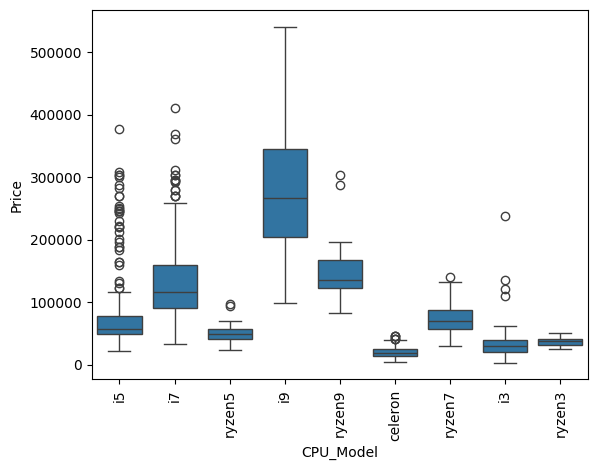

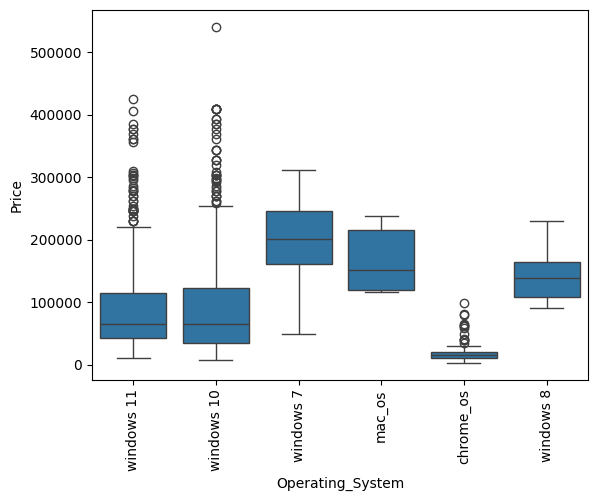

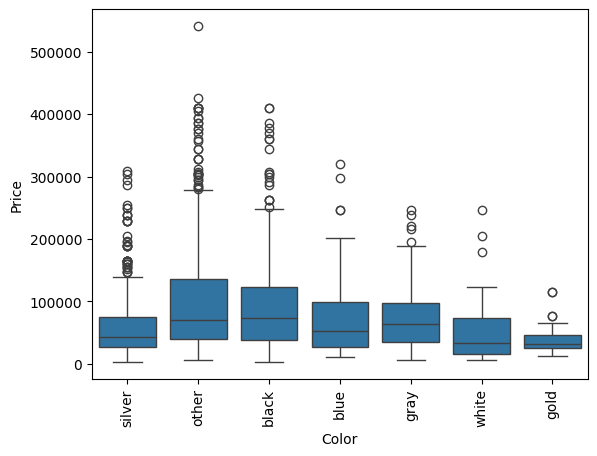

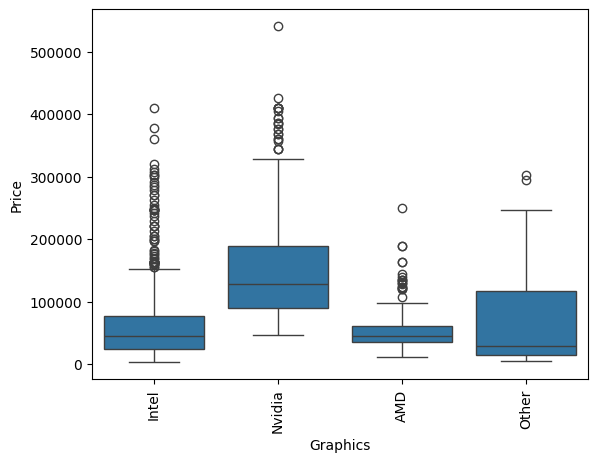

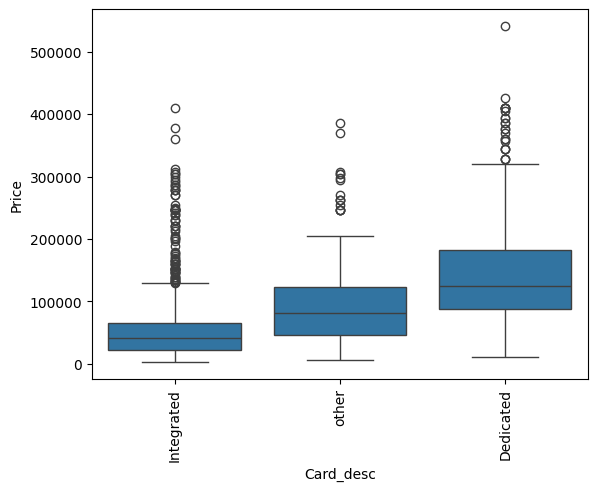

In [ ]:
for feature in categorical_features:
  sns.boxplot(x=feature, y=target_feature, data=df, )
  plt.xticks(rotation=90)
  plt.show()

<Axes: xlabel='Price', ylabel='Density'>

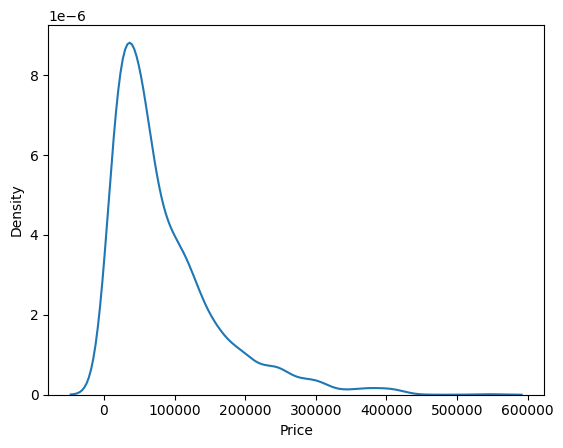

In [ ]:
sns.kdeplot(df[target_feature])

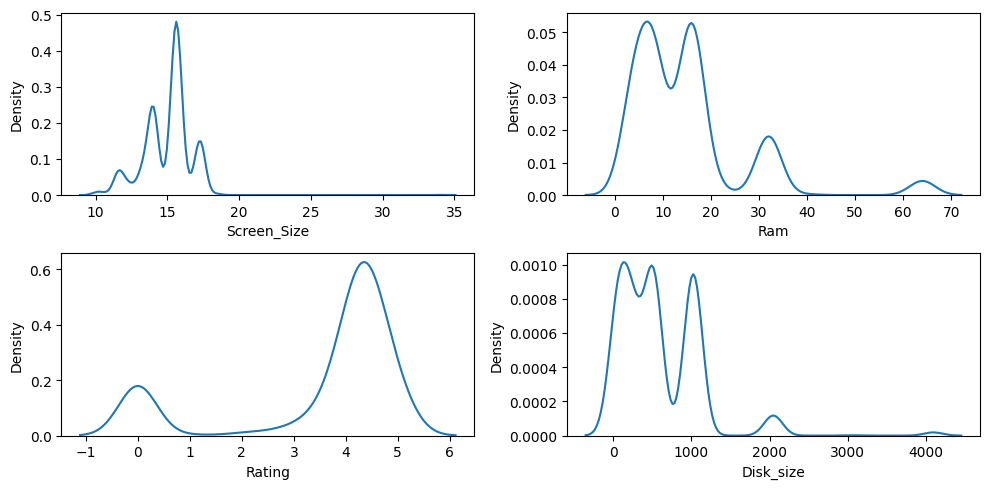

In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over numerical features and plot on subplots
for i, feature in enumerate(numerical_features):
  sns.kdeplot(df[feature], ax=axes[i])

# Display the plot
plt.tight_layout()
plt.show()

- All the nuerical features are either left skewed or right skewed
- Apply a power transform featurewise to make data more Gaussian-like.
- Power transformation is a technique used to stabilize variance and make data more normal distribution-like.
- Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

##Checking Skewness

In [ ]:
# Check Skewness
df[numerical_features].skew(axis=0, skipna=True)

,0
Screen_Size,0.291866
Ram,2.155101
Rating,-1.518446
Disk_size,2.282880


- Positively Skewed Features : Screen_Size, Ram, Disk_size
- Negatively Skewed Features : Rating

##Applying Power Transformer to reduce skewness and handle outliers

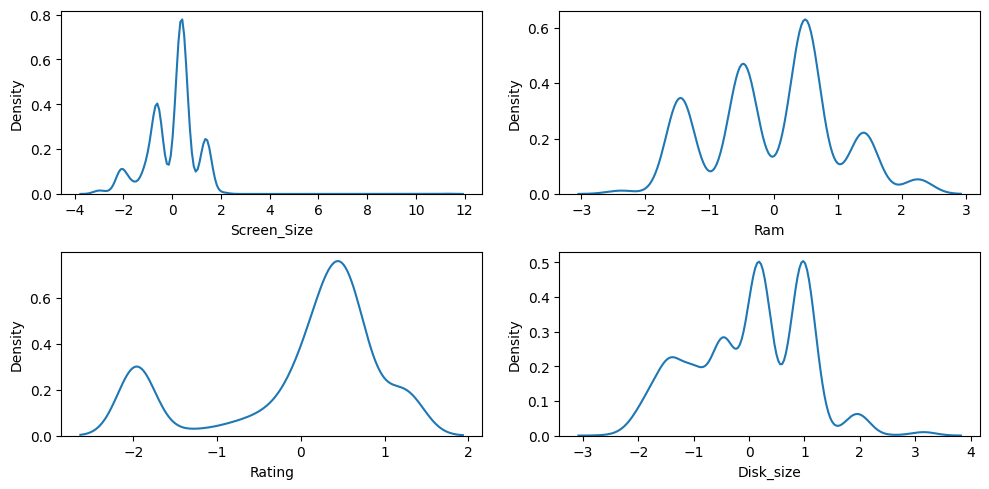

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_copy = pt.fit_transform(df[numerical_features])
X_copy = pd.DataFrame(X_copy, columns=numerical_features)

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over numerical features and plot on subplots
for i, feature in enumerate(numerical_features):
  sns.kdeplot(X_copy[feature], ax=axes[i])

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
X_copy.skew(axis=0, skipna=True)

,0
Screen_Size,0.187285
Ram,0.020202
Rating,-1.036984
Disk_size,-0.074395


###Unique groups for categorical columns

In [ ]:
for feature in categorical_features:
    print(feature,':', df[feature].nunique())

Brand : 16
CPU_Model : 9
Operating_System : 6
Color : 7
Graphics : 4
Card_desc : 3


In [ ]:
# df.drop(['Color', 'Graphics'], axis=1, inplace=True)

##Preprocessing features

In [ ]:
# Create Column Transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, categorical_features),
        ("Transformer", transform_pipe, numerical_features),
        ("StandardScaler", numeric_transformer, numerical_features)
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X.shape

(1807, 53)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [ ]:
def evaluate_regression(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2_ = r2_score(true, predicted)
    return mae, mse, r2_

In [ ]:
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=False),
    'AdaBoost': AdaBoostRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNN Regressor': KNeighborsRegressor()
}

In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1445, 53), (362, 53))

In [ ]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    models_list = []
    r2_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Training set performance
        mae, mse, r2_ = evaluate_regression(y_test ,y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        r2_list.append(r2_)

        print("- Root Mean Squared Error: {:.4f}".format(np.sqrt(mse)))
        print("- Mean Absolute Error: {:.4f}".format(mae))
        print("- R2 Score: {:.4f}".format(r2_))

        print('----------------------------------')


    report = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

    return report

In [ ]:
base_model_report = evaluate_models(X = X, y = y, models=models)

Decision Tree
- Root Mean Squared Error: 39871.1338
- Mean Absolute Error: 20905.2084
- R2 Score: 0.6800
----------------------------------
Random Forest
- Root Mean Squared Error: 30217.3262
- Mean Absolute Error: 16542.7476
- R2 Score: 0.8162
----------------------------------
Gradient Boosting
- Root Mean Squared Error: 31620.5974
- Mean Absolute Error: 19204.6598
- R2 Score: 0.7988
----------------------------------
Linear Regression
- Root Mean Squared Error: 33128.5821
- Mean Absolute Error: 20806.1235
- R2 Score: 0.7791
----------------------------------
XGBoost
- Root Mean Squared Error: 32554.9458
- Mean Absolute Error: 17078.0825
- R2 Score: 0.7867
----------------------------------
CatBoost
- Root Mean Squared Error: 29976.2761
- Mean Absolute Error: 17026.4555
- R2 Score: 0.8191
----------------------------------
AdaBoost
- Root Mean Squared Error: 55315.1883
- Mean Absolute Error: 49279.5438
- R2 Score: 0.3842
----------------------------------
Ridge
- Root Mean Squared Er

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434764240257.5021, tolerance: 840600386.6246796
  model = cd_fast.sparse_enet_coordinate_descent(


In [ ]:
base_model_report

,Model Name,R2_Score
5,CatBoost,0.819144
1,Random Forest,0.816223
2,Gradient Boosting,0.798758
4,XGBoost,0.786690
7,Ridge,0.783367
8,Lasso,0.779111
3,Linear Regression,0.779106
9,KNN Regressor,0.723168
0,Decision Tree,0.680040
6,AdaBoost,0.384161


##Hyper-parameter tuning

In [ ]:
#Initialize few parameter for Hyperparamter tuning
catboost_params = {
    'iterations': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'depth': [4, 6, 8, 10],
}

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [4, 6, 8],
}

gradient_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [4, 6, 8],
}

In [ ]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('CatBoost', CatBoostRegressor(verbose=False), catboost_params),
    ('XGBoost', XGBRegressor(), xgb_params),
    ('Gradient Boosting', GradientBoostingRegressor(), gradient_params)
]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X, y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 3 folds for each of 36 candidates, totalling 108 fits
---------------- Best Params for CatBoost -------------------
{'learning_rate': 0.05, 'iterations': 400, 'depth': 6}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
---------------- Best Params for Gradient Boosting -------------------
{'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.05}


In [ ]:
model_param

{'CatBoost': {'learning_rate': 0.05, 'iterations': 400, 'depth': 6},
 'XGBoost': {'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1},
 'Gradient Boosting': {'n_estimators': 300,
  'max_depth': 4,
  'learning_rate': 0.05}}

In [ ]:
best_models = {
    'CatBoost': CatBoostRegressor(verbose=False, **model_param['CatBoost']),
    'XGBoost': XGBRegressor(**model_param['XGBoost']),
    'Gradient Boosting': GradientBoostingRegressor(**model_param['Gradient Boosting']) # Use the correct key 'Gradient Boosting'
}
tuned_report = evaluate_models(X = X, y = y, models=best_models)

CatBoost
- Root Mean Squared Error: 30595.9315
- Mean Absolute Error: 18285.2330
- R2 Score: 0.8116
----------------------------------
XGBoost
- Root Mean Squared Error: 30152.1401
- Mean Absolute Error: 18383.6038
- R2 Score: 0.8170
----------------------------------
Gradient Boosting
- Root Mean Squared Error: 30704.0816
- Mean Absolute Error: 18322.7989
- R2 Score: 0.8103
----------------------------------


In [ ]:
temp_model = CatBoostRegressor(verbose=False)
temp_model.fit(X_train, y_train)
y_pred = temp_model.predict(X_test)

In [ ]:
# Assuming you have trained a model named 'model' (e.g., XGBRegressor, CatBoostRegressor)

# Get feature importances
importances = temp_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': importances})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importances)

                                       Feature  Importance
20                 OneHotEncoder__CPU_Model_i9   19.400846
19                 OneHotEncoder__CPU_Model_i7   11.189320
40              OneHotEncoder__Graphics_Nvidia    7.538357
12              OneHotEncoder__Brand_Panasonic    6.322135
48                      Transformer__Disk_size    5.602728
14              OneHotEncoder__Brand_Toughbook    4.194319
50                         StandardScaler__Ram    4.054127
46                            Transformer__Ram    3.838379
52                   StandardScaler__Disk_size    3.738228
49                 StandardScaler__Screen_Size    3.672542
51                      StandardScaler__Rating    3.437680
47                         Transformer__Rating    3.420312
45                    Transformer__Screen_Size    2.538090
2               OneHotEncoder__Brand_Alienware    2.199693
35                  OneHotEncoder__Color_other    1.796720
43         OneHotEncoder__Card_desc_Integrated    1.7525

In [ ]:
df[df.CPU_Model == 'ryzen5']['Price'].values.max()

97168.36

In [ ]:
df.Operating_System.value_counts()

,count
Operating_System,
windows 11,837
windows 10,745
chrome_os,187
windows 7,27
windows 8,6
mac_os,5


In [ ]:
df.Color.value_counts()

,count
Color,
other,663
black,472
silver,367
gray,125
blue,95
white,47
gold,38


In [ ]:
df.CPU_Model.value_counts()

,count
CPU_Model,
i7,584
i5,366
i3,288
celeron,269
ryzen7,81
i9,80
ryzen5,69
ryzen3,40
ryzen9,30


In [ ]:
df.Brand.value_counts()

,count
Brand,
ASUS,314
HP,287
Acer,252
MSI,181
Dell,165
SAMSUNG,115
EXCaliberPC,91
Alienware,79
Microsoft,70


In [ ]:
df.Graphics.value_counts()

,count
Graphics,
Intel,1000
Nvidia,513
AMD,205
Other,89


In [ ]:
df.drop(['Operating_System', 'Color'], axis=1, inplace=True)

In [ ]:
# color_counts = df['Color'].value_counts()
# color_to_replace = color_counts[color_counts < 300].index
# df['Color'] = df['Color'].replace(color_to_replace, 'Other')

In [ ]:
# df.Color.value_counts()

In [ ]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features

['Brand', 'CPU_Model', 'Graphics', 'Card_desc']

In [ ]:
numerical_features = df.select_dtypes(exclude='object').columns.tolist()[:-1]
numerical_features

['Unnamed: 0', 'Screen_Size', 'Ram', 'Rating', 'Disk_size']

In [ ]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Screen_Size', 'CPU_Model', 'Ram', 'Rating',
       'Graphics', 'Disk_size', 'Card_desc', 'Price'],
      dtype='object')

In [ ]:
X = df.drop('Price', axis=1)
y = df.Price
y = np.array(y)

In [ ]:
# Create Column Transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, categorical_features),
        ("Transformer", transform_pipe, numerical_features),
        ("StandardScaler", numeric_transformer, numerical_features)
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
# Create a function which can evaluate models and return a report
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    models_list = []
    r2_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_test_pred = model.predict(X_test)

        # Training set performance
        mae, mse, r2_ = evaluate_regression(y_test ,y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        r2_list.append(r2_)

        print("- Root Mean Squared Error: {:.4f}".format(np.sqrt(mse)))
        print("- Mean Absolute Error: {:.4f}".format(mae))
        print("- R2 Score: {:.4f}".format(r2_))

        print('----------------------------------')


    report = pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

    return report

In [ ]:
base_model_report = evaluate_models(X = X, y = y, models=models)

Decision Tree
- Root Mean Squared Error: 40937.9719
- Mean Absolute Error: 22374.4951
- R2 Score: 0.6627
----------------------------------
Random Forest
- Root Mean Squared Error: 33077.2353
- Mean Absolute Error: 18918.9064
- R2 Score: 0.7798
----------------------------------
Gradient Boosting
- Root Mean Squared Error: 33802.1090
- Mean Absolute Error: 19799.1875
- R2 Score: 0.7700
----------------------------------
Linear Regression
- Root Mean Squared Error: 33592.7404
- Mean Absolute Error: 21239.8292
- R2 Score: 0.7729
----------------------------------
XGBoost
- Root Mean Squared Error: 36896.2222
- Mean Absolute Error: 19975.4108
- R2 Score: 0.7260
----------------------------------
CatBoost
- Root Mean Squared Error: 31460.0117
- Mean Absolute Error: 18231.1811
- R2 Score: 0.8008
----------------------------------
AdaBoost
- Root Mean Squared Error: 55195.2392
- Mean Absolute Error: 49225.0251
- R2 Score: 0.3868
----------------------------------
Ridge
- Root Mean Squared Er

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.619e+10, tolerance: 8.406e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
base_model_report

,Model Name,R2_Score
5,CatBoost,0.800797
7,Ridge,0.779813
1,Random Forest,0.779790
8,Lasso,0.772988
3,Linear Regression,0.772873
2,Gradient Boosting,0.770033
4,XGBoost,0.726005
9,KNN Regressor,0.715889
0,Decision Tree,0.662689
6,AdaBoost,0.386829


In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
X_train.shape, X_test.shape

((1445, 42), (362, 42))

In [ ]:
temp_model = CatBoostRegressor(verbose=False)
temp_model.fit(X_train, y_train)
y_pred = temp_model.predict(X_test)

In [ ]:
# Assuming you have trained a model named 'model' (e.g., XGBRegressor, CatBoostRegressor)

# Get feature importances
importances = temp_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': importances})

# Sort feature importances in descending order
feature_importances2 = feature_importances.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importances2)

                                Feature  Importance
20          OneHotEncoder__CPU_Model_i9   17.672093
19          OneHotEncoder__CPU_Model_i7   10.736043
41            StandardScaler__Disk_size    5.704527
39                  StandardScaler__Ram    5.491037
14       OneHotEncoder__Brand_Toughbook    5.452505
12       OneHotEncoder__Brand_Panasonic    5.354481
34                     Transformer__Ram    4.923815
27       OneHotEncoder__Graphics_Nvidia    4.661286
36               Transformer__Disk_size    4.276925
32              Transformer__Unnamed: 0    3.770151
35                  Transformer__Rating    3.750522
33             Transformer__Screen_Size    3.621657
37           StandardScaler__Unnamed: 0    3.548114
40               StandardScaler__Rating    3.000548
2        OneHotEncoder__Brand_Alienware    2.581361
38          StandardScaler__Screen_Size    2.253777
30  OneHotEncoder__Card_desc_Integrated    1.713915
1             OneHotEncoder__Brand_Acer    1.327402
10          

In [ ]:
df[df.CPU_Model == 'i5']

,Unnamed: 0,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Card_desc,Price
0,0,Microsoft,12.4,i5,4.0,3.9,Intel,256.0,Integrated,29519.18
2,2,Dell,15.6,i5,16.0,4.3,Intel,256.0,Integrated,67076.00
15,15,Panasonic,14.0,i5,4.0,3.1,Intel,320.0,Integrated,159899.18
16,16,MSI,15.6,i5,16.0,5.0,Nvidia,1024.0,Dedicated,56579.18
25,25,MSI,15.6,i5,32.0,4.2,Nvidia,1024.0,Dedicated,65518.00
...,...,...,...,...,...,...,...,...,...,...
1796,1848,Microsoft,12.4,i5,4.0,4.2,Intel,64.0,Integrated,21565.18
1797,1849,Microsoft,12.4,i5,4.0,4.2,Intel,64.0,Integrated,21565.18
1798,1850,Microsoft,12.4,i5,4.0,4.4,Intel,64.0,Integrated,20909.18
1799,803,GIGABYTE,15.6,i5,16.0,0.0,Nvidia,512.0,Dedicated,65317.10


In [ ]:
df.Brand.value_counts()

,count
Brand,
ASUS,314
HP,287
Acer,252
MSI,181
Dell,165
SAMSUNG,115
EXCaliberPC,91
Alienware,79
Microsoft,70


In [ ]:
df.head()

,Unnamed: 0,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Card_desc,Price
0,0,Microsoft,12.4,i5,4.0,3.9,Intel,256.0,Integrated,29519.18
1,1,HP,34.0,i7,32.0,4.4,Nvidia,512.0,other,177694.00
2,2,Dell,15.6,i5,16.0,4.3,Intel,256.0,Integrated,67076.00
3,3,MSI,15.6,ryzen5,16.0,4.5,AMD,512.0,other,57318.00
4,4,MSI,17.3,i9,64.0,5.0,Nvidia,2048.0,Dedicated,200899.18


###We are best best r2 score of 81%. We will scrap more data and combine it with our current dataframe and retrain the model. For a time being, 'Card_desc' feature is not having much feature importance score, so we will drop it.

In [ ]:
df.drop(['Unnamed: 0', 'Card_desc'], axis=1, inplace=True)

In [ ]:
df.head()

,Brand,Screen_Size,CPU_Model,Ram,Rating,Graphics,Disk_size,Price
0,Microsoft,12.4,i5,4.0,3.9,Intel,256.0,29519.18
1,HP,34.0,i7,32.0,4.4,Nvidia,512.0,177694.00
2,Dell,15.6,i5,16.0,4.3,Intel,256.0,67076.00
3,MSI,15.6,ryzen5,16.0,4.5,AMD,512.0,57318.00
4,MSI,17.3,i9,64.0,5.0,Nvidia,2048.0,200899.18


In [ ]:
df.to_csv('set_df.csv')